##<font face="Rage" size=7 color='#d39aed'> Objective </font><br>
*In this notebook we will perform Assortment Analysis on Big Basket Dataset*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
! mkdir data
! cp   "/content/drive/MyDrive/PROJECTS/Big-Basket/data/BigBasket-Products.csv"  "/content/data/";

##<font face="Rage" size=7 color='#d39aed'> Dataset </font><br>

This dataset contains 10 attributes with simple meaning and which are described as follows:

* index - Simply the Index!
* product - Title of the product (as they're listed)
category - Category into which product has been classified
* sub_category - Subcategory into which product has been kept
* brand - Brand of the product
* sale_price - Price at which product is being sold on the site
* market_price - Market price of the product
* type - Type into which product falls
rating - Rating the product has got from its consumers
* description - Description of the dataset (in detail)


While doing FE, "discount" can be created as (market_price - sale_price)/ market_price x 100 which will help in getting what consumers are getting better here!


In [19]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [20]:
big_basket_details = pd.read_csv("/content/data/BigBasket-Products.csv")
big_basket_details.head(5)

index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridge Bottles     2.3   
2       119.0         250.0           Lamp & Lamp Oil     3.4   
3       149.0         176.0  Laundry, Storage Baskets     3.7   
4       162.0         162.0      Bathing Bars & Soaps     4.4   

                                         description  
0  This Product contains Garlic Oil that is known...  
1  Each product is microwave safe (without lid), ...  
2  A perfect gift for all occasions, be it your m...  
3  Multipurpose container with an attractive desi...  
4  Nivea Creme Soft Soap gives your skin the best...

In [21]:
#lets look at variable info and check for inconsistencies

big_basket_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


<font face="Rage" size=6 color='#b2fba5'> Observations </font> <br>
1. Total Rows : 27555
2. Total Columns : 10
3. Missing Values : product, brand, rating, description column
4. Datatypes : int64, float64, object

In [22]:
big_basket_details.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

##<font face="Rage" size=7 color='#d39aed'> Category Field </font><br>


###<font face="Rage" size=6 color='d39aed'> Vertical Depth </font> <br>


*   *we can understand range and depth of company's offerings withing a specific category.*
* *To determine company's primary focus we will examine following fields withing each category :*
  * subcategories
  * brands
  * products available
* *This analysis will ensure customer requirements are fullfilled, resulting in :*
  * better customer experience
  * increasing company revenue




In [23]:
total_categories_count = big_basket_details['category'].nunique()

category_subcategory_depth = big_basket_details.groupby('category')['sub_category'].nunique()

category_product_depth = big_basket_details.groupby('category')['product'].nunique()

print("TOTAL CATEGORIES : ", total_categories_count)
print("\n\nSUBCATEGORY DEPTH : ", category_subcategory_depth)
print("\n\nPRODUCT DEPTH : ", category_product_depth)


TOTAL CATEGORIES :  11


SUBCATEGORY DEPTH :  category
Baby Care                    7
Bakery, Cakes & Dairy        8
Beauty & Hygiene            10
Beverages                    6
Cleaning & Household        10
Eggs, Meat & Fish            6
Foodgrains, Oil & Masala     9
Fruits & Vegetables          7
Gourmet & World Food        14
Kitchen, Garden & Pets      10
Snacks & Branded Foods      12
Name: sub_category, dtype: int64


PRODUCT DEPTH :  category
Baby Care                    549
Bakery, Cakes & Dairy        752
Beauty & Hygiene            6839
Beverages                    755
Cleaning & Household        2411
Eggs, Meat & Fish            338
Foodgrains, Oil & Masala    1997
Fruits & Vegetables          353
Gourmet & World Food        4109
Kitchen, Garden & Pets      3186
Snacks & Branded Foods      2454
Name: product, dtype: int64


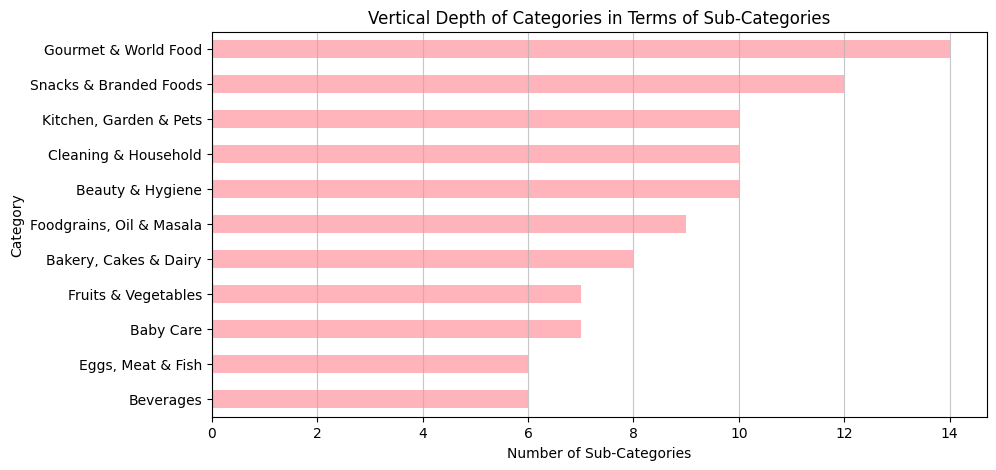

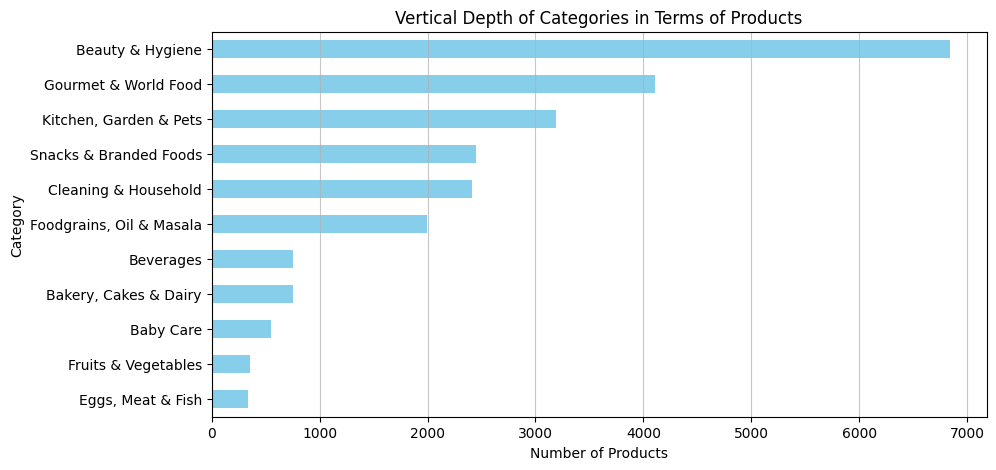

In [24]:
# Plotting the vertical depth of each category in terms of sub-categories
plt.figure(figsize=(10, 5))
category_subcategory_depth.sort_values().plot(kind='barh', color='#FFB3BA')
plt.title('Vertical Depth of Categories in Terms of Sub-Categories')
plt.xlabel('Number of Sub-Categories')
plt.ylabel('Category')
plt.grid(axis='x',  alpha=0.7)
plt.show()

# Plotting the vertical depth of each category in terms of product
plt.figure(figsize=(10, 5))
category_product_depth.sort_values().plot(kind='barh', color='skyblue')
plt.title('Vertical Depth of Categories in Terms of Products')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.grid(axis='x', alpha=0.7)
plt.show()

<font face="Rage" size=6 color='#b2fba5'> Observations </font> <br>

**Highest Product Count:**

- **Beauty & Hygiene:** 6839 products
<br>*take : broad range and diverse target market*
- **Gourmet & World Food:** 4109 products
<br>*take : strong specialty and international foods presence.*

**Subcategory Diversity:**

- **Gourmet & World Food:** 14 subcategories
<br>*take : wide variety of product types.*
- **Snacks & Branded Foods:** 12 subcategories
<br>*take : diverse snack options.*

**Balanced Categories:**

- **Cleaning & Household:** 10 subcategories, 2411 products
<br>*take : balanced variety and quantity.*
- **Kitchen, Garden & Pets:** 10 subcategories, 3186 products
<br>*take : well-rounded range*.

**Specialized Categories:**

- **Eggs, Meat & Fish:** 6 subcategories, 338 products
<br>*take : focused range.*
- **Fruits & Vegetables:** 7 subcategories, 353 products
<br>*take : essential fresh produce.*

**Potential Growth Areas:**

- **Baby Care and Beverages:** 7 and 6 subcategories respectively
<br>*take : opportunities for product range expansion.*


### <font face="Rage" size=6 color='#d39aed'> Subcategories vs Products </font> <br>

In [25]:
subcategory_product_counts = big_basket_details['sub_category'].value_counts()

category_subcategory_product_counts = big_basket_details.groupby(['category', 'sub_category']).size().reset_index(name='product_count')

<ipython-input-26-aeead27c0f92>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-aeead27c0f92>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-aeead27c0f92>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-aeead27c0f92>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-aeead27c0f92>:17: FutureWarning: 

Passing `pa

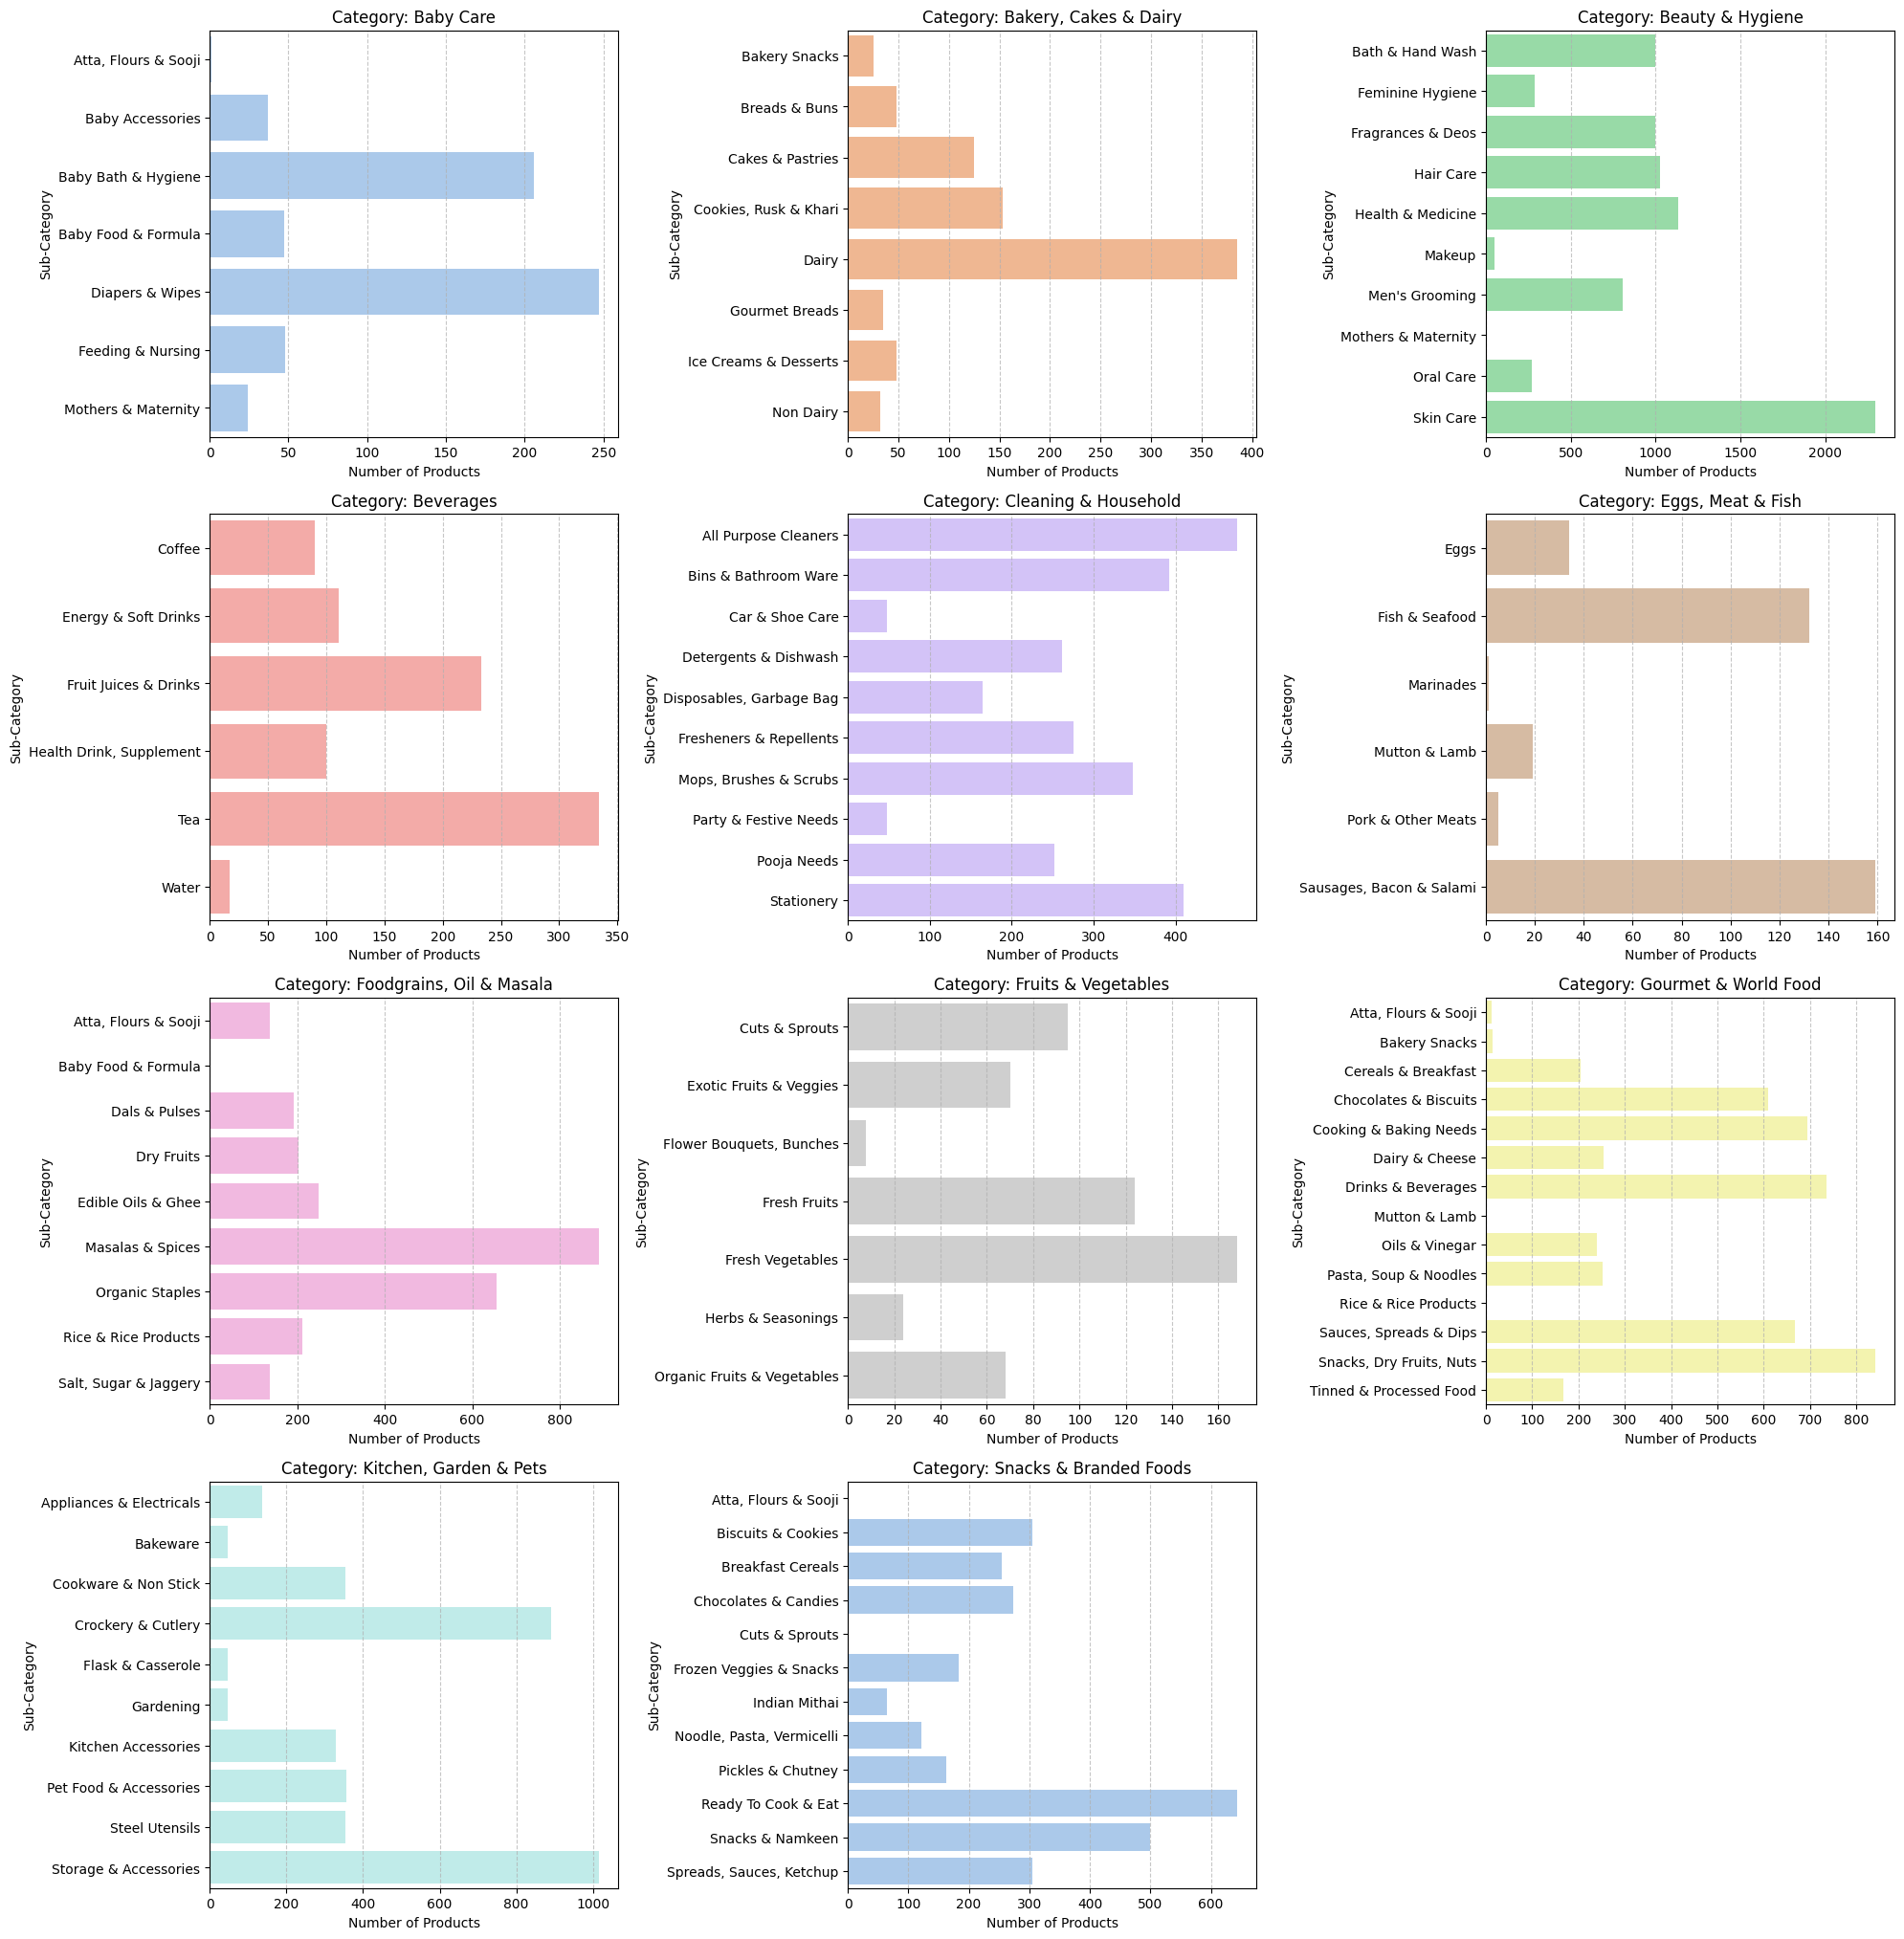

In [26]:
num_cols = 3
num_rows = (total_categories_count // num_cols) + (total_categories_count % num_cols)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))


# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a color palette for the categories
category_colors = sns.color_palette("pastel", total_categories_count)

# Plot the data for each category with unique colors
for i, (category, ax) in enumerate(zip(category_subcategory_product_counts['category'].unique(), axes)):
    sub_data = category_subcategory_product_counts[category_subcategory_product_counts['category'] == category]
    sns.barplot(
        data=sub_data,
        y='sub_category',
        x='product_count',
        palette=[category_colors[i]] * len(sub_data),
        ax=ax
    )
    ax.set_title(f'Category: {category}')
    ax.set_xlabel('Number of Products')
    ax.set_ylabel('Sub-Category')
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<font face="Rage" size=6 color='b2fba5'> Observations </font> <br>

**Beauty & Hygiene:**

- **Skin Care:** Highest product count, strong focus.
- **Hair Care & Health & Medicine:** Comprehensive personal care and health products.

**Gourmet & World Food:**

- **Snacks, Dry Fruits, Nuts:** High product counts, popular with customers.
- **Cooking Pastes & Sauces, Baking Ingredients:** Diverse assortment for culinary enthusiasts.

**Kitchen, Garden & Pets:**

- **Kitchen Accessories & Cookware:** Focus on kitchen utilities and tools.
- **Storage & Accessories:** Significant product range for kitchen organization.


###<font face="Rage" size=6 color='d39aed'> Price Distribution </font> <br>

*Analyzing price distribution provides key insights into the business's target market. The average price point indicates the customer segment they aim to attract. Lower prices suggest a strategy to appeal to a broader audience, while higher prices indicate a focus on a more affluent customer base.*

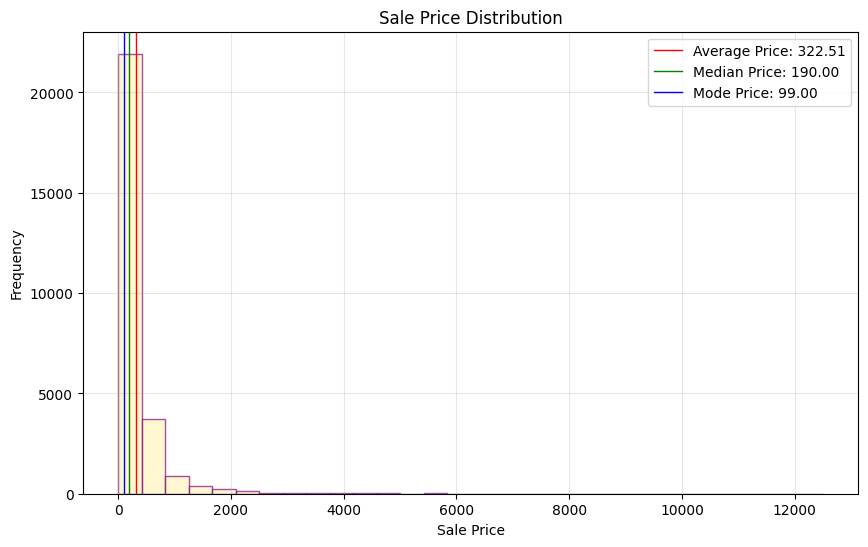

(322.5148078388677, 190.0, 99.0, 486.26311554286724)

In [27]:
# Conduct price distribution analysis on the sale price
sale_prices = big_basket_details['sale_price'].dropna()

# Calculate average, median, and mode prices
average_price = sale_prices.mean()
median_price = sale_prices.median()
mode_price = sale_prices.mode()[0]  # mode() returns a Series; take the first element
price_variation = sale_prices.std()

# Plot the distribution of sale prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(sale_prices, bins=30, color='#fff4bc', edgecolor='purple', alpha=0.7)
plt.axvline(average_price, color='r', linewidth=1, label=f'Average Price: {average_price:.2f}')
plt.axvline(median_price, color='g', linewidth=1, label=f'Median Price: {median_price:.2f}')
plt.axvline(mode_price, color='b', linewidth=1, label=f'Mode Price: {mode_price:.2f}')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

# Display calculated values
average_price, median_price, mode_price, price_variation

<font face="Rage" size=6 color='b2fba5'> Observations </font> <br>
1. **Average Sale Price:** ₹322.51, implies that overall pricing level of the products is about ₹322.51.

2. **Median Sale Price:** ₹190.00, meaning half of the products cost less than this amount, indicating a concentration of lower-priced items. Also notice that Median < Average this indicates that prices are Positively Skewed.

3. **Mode Sale Price:** ₹99.00, represents the most frequent price point among the products. Thus half of the products are priced < ₹190 and among those also many settle at ₹99.00 , this also gives us a clue about customer psychology.

4. **High Standard Deviation:** ₹486.26, showing a wide range in prices, from affordable everyday items to expensive specialty or premium products. Still the number of high priced items are less number of low priced items, this also show the market balance.


##<font face="Rage" size=7 color='#d39aed'> Customer Feedback Aanalysis </font><br>

###<font face="Rage" size=6 color='#d39aed'> Customer Prefferrence </font><br>

- **Best and Worst Performers:**<br> Rank and list products according to average ratings to determine which ones perform the best and worst.

- **Market Gap:**<br> different market with fewer products but more satisfied customers, indicated by a high rating for a less popular product.

- **Group View:**<br> Identify groups with low ratings and low average ratings. Develop strategies to better understand and address the needs of consumers in these areas.



####<font face="Rage" size=6 color='Lightblue'> Performers </font><br>

*For making relible insights we will only select those categories and subcategories which have atleast 50 products with ratings.*<br><br>
*Generally, most people rate the product only when they are super happy or super disappointed, so in non-extream cases there can be many new products which are bieng used but not rated due to lack of motivation.*

In [34]:
# we will group the products according to their categories and calculate aggregate rating
cat_group = big_basket_details.groupby('category').agg({'rating': 'count'}).reset_index()
cat_group.rename(columns={'rating': 'counts'}, inplace=True)

# select only those categories which have atleast 50 reviews
cat_group_filtered = cat_group[cat_group['counts'] >= 50]

# perform inner join to get the relevant rows
cat_group_filtered = pd.merge(big_basket_details, cat_group_filtered[['category']], on=['category'], how='inner')

# Calculate the mean rating for each category
category_ratings = cat_group_filtered.groupby(['category'])['rating'].mean().reset_index()

# select the best and worst categories
best_category = category_ratings.loc[category_ratings['rating'].idxmax()]
worst_category = category_ratings.loc[category_ratings['rating'].idxmin()]

print("BEST CATEGORY : ", best_category.category, "\nRATING : ", best_category.rating)
print("\nWORST CATEGORY : ", worst_category.category, "\nRATING : ", worst_category.rating)

BEST CATEGORY :  Beverages 
RATING :  4.084858044164038

WORST CATEGORY :  Kitchen, Garden & Pets 
RATING :  3.7347150259067354


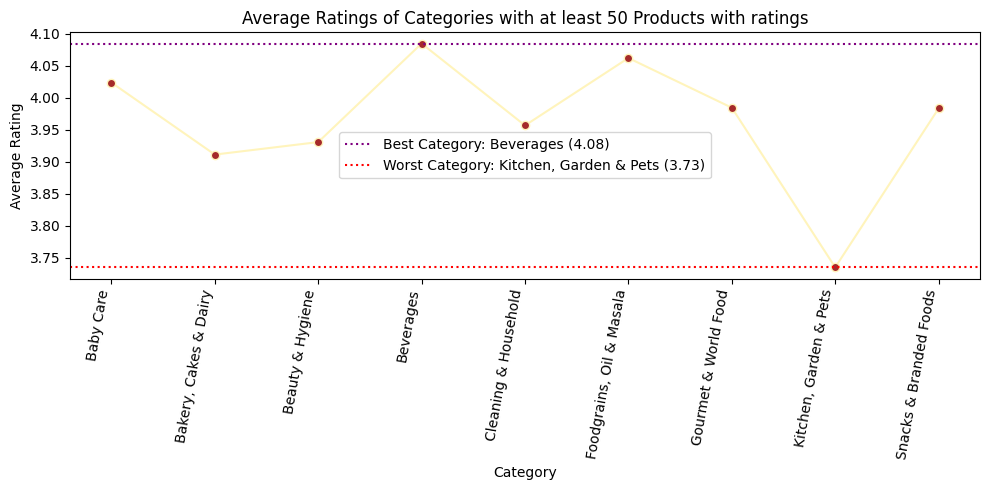

In [29]:
# plot the avg ratings for the filtered categories
plt.figure(figsize=(10, 5))
plt.plot(category_ratings['category'], category_ratings['rating'], color='#fff4bc', marker='o', mfc = 'brown')
plt.axhline(best_category['rating'], color='purple', ls=':',  label=f"Best Category: {best_category['category']} ({best_category['rating']:.2f})")
plt.axhline(worst_category['rating'], color='red',ls=':',  label=f"Worst Category: {worst_category['category']} ({worst_category['rating']:.2f})")
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Categories with at least 50 Products with ratings')
plt.xticks(rotation=80, ha='right')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [32]:
# we will group the products according to their subcategories and calculate aggregate rating
subcat_group = big_basket_details.groupby('sub_category').agg({'rating': 'count'}).reset_index()
subcat_group.rename(columns={'rating': 'counts'}, inplace=True)

# select only those subcategories which have atleast 50 reviews
subcat_group_filtered = subcat_group[subcat_group['counts'] >= 50]

# perform inner join to get the relevant rows
subcat_products_filtered = pd.merge(big_basket_details, subcat_group_filtered[['sub_category']], on=['sub_category'], how='inner')

# calculate the mean rating for each subcategory
subcat_ratings = subcat_products_filtered.groupby(['sub_category'])['rating'].mean().reset_index()

# select the best and worst subcategories
best_subcategory = subcat_ratings.loc[subcat_ratings['rating'].idxmax()]
worst_subcategory = subcat_ratings.loc[subcat_ratings['rating'].idxmin()]

print("BEST SUBCATEGORY : ", best_subcategory.sub_category, "\nRATING : ", best_subcategory.rating)
print("\nWORST SUBCATEGORY : ", worst_subcategory.sub_category, "\nRATING : ", worst_subcategory.rating)

BEST SUBCATEGORY :  Detergents & Dishwash 
RATING :  4.264390243902439

WORST SUBCATEGORY :  Steel Utensils 
RATING :  3.5430188679245282


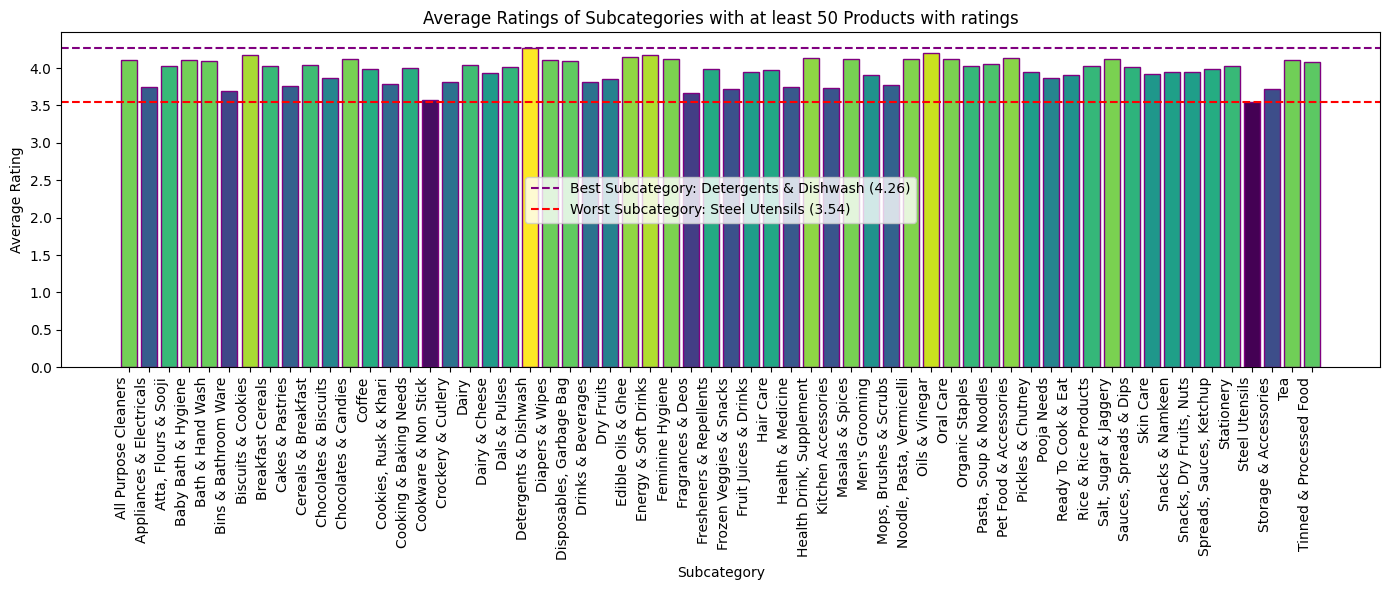

In [129]:
# since so many subcategories having multicolored graph
# will be easier to read
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=min(subcat_ratings['rating']), vmax=max(subcat_ratings['rating']))
colors = [cmap(norm(value)) for value in subcat_ratings['rating']]

# plot the avg ratings for the filtered subcategories
plt.figure(figsize=(14, 6))
plt.bar(subcat_ratings['sub_category'], subcat_ratings['rating'], color=colors, edgecolor='purple')
plt.axhline(best_subcategory['rating'], color='purple', linestyle='--', label=f"Best Subcategory: {best_subcategory['sub_category']} ({best_subcategory['rating']:.2f})")
plt.axhline(worst_subcategory['rating'], color='red', linestyle='--', label=f"Worst Subcategory: {worst_subcategory['sub_category']} ({worst_subcategory['rating']:.2f})")
plt.xlabel('Subcategory')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Subcategories with at least 50 Products with ratings')
plt.xticks(rotation=90, ha='right')
plt.legend(loc='center')
plt.tight_layout()
plt.show()

<font face="Rage" size=6 color='b2fba5'> Observations </font> <br>
###Product Performance Analysis

#### Top-Performing Categories

* **Beverages:** <br> This category exhibits the highest customer satisfaction, indicating products that consistently meet or surpass consumer expectations in terms of quality and overall experience.

#### Underperforming Categories

* **Kitchen, Garden, and Pets:** <br> This category demonstrates the lowest customer satisfaction, suggesting potential issues with product quality, functionality, or overall customer experience. A deeper analysis is recommended to identify specific areas for improvement.

#### High-Performing Subcategories

* **Detergents and Dishwash:** <br> Within the Cleaning and Household category, this segment boasts the highest customer satisfaction, signifying a strong product offering. Leveraging this success through marketing and product development could be beneficial.

#### Underperforming Subcategories

* **Steel Utensils:** <br> This segment displays the lowest customer satisfaction, indicating potential concerns or unmet customer needs. Addressing these issues can significantly enhance overall customer satisfaction and loyalty.




####<font face="Rage" size=6 color='Lightblue'> Market Gaps </font><br>

*The Market Gap is usually created when there is high customer interst but fewer products and fewer customers , so if we will select the categories with atleast 2 and atmost 5 products and high rating ( rating > 4 )*

In [131]:
# Determine the mean rating and total products within each category/subcategory.
product_with_rating = big_basket_details[big_basket_details.rating > 0]
category_aggregate = product_with_rating.groupby(['category', 'sub_category']).agg({
    'rating': 'mean',
    'brand': 'nunique'
}).rename(columns={'rating': 'average_rating', 'brand': 'brand_count'}).reset_index()

# Finding categories/subcategories with few products but strong average ratings.
min_threshold_product_count = 2
max_threshold_product_count = 5
min_threshold_rating = 4.0

gaps_in_market = category_aggregate[
    ((category_aggregate['brand_count'] >= min_threshold_product_count) & (category_aggregate['brand_count'] <= max_threshold_product_count)) &
    (category_aggregate['average_rating'] >= min_threshold_rating)
]

gaps_in_market

category          sub_category  average_rating  brand_count
49  Gourmet & World Food  Atta, Flours & Sooji            4.09            4

*since we know that Category/Subcategory with market gap is :
Gourmet & World Food	Atta, Flours & Sooji
lets look at the products offered in this category within various price range.*

<ipython-input-36-f1f5e772a786>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gourmet_flour_data['price_range'] = pd.cut(gourmet_flour_data['sale_price'], bins=bins, labels=labels)


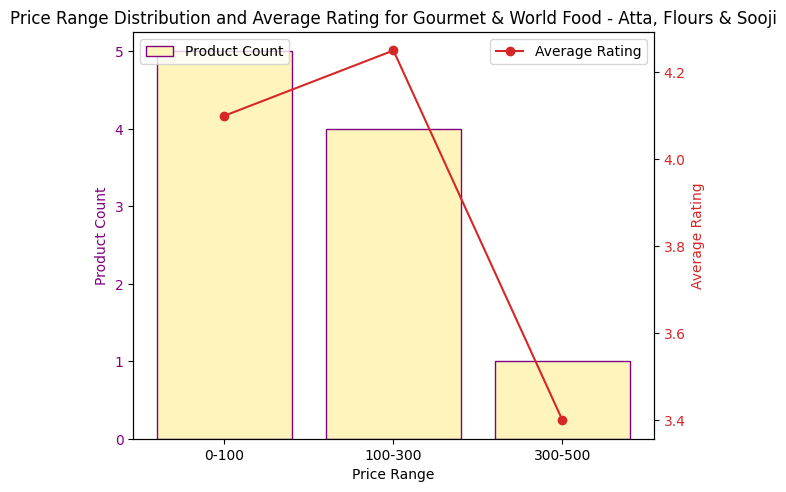

In [36]:
# Filtering data for Gourmet and World Food
gourmet_flour_data = big_basket_details[(big_basket_details['category'] == 'Gourmet & World Food') & (big_basket_details['sub_category'] == 'Atta, Flours & Sooji') & (big_basket_details['rating'] >= 0)]

# Creating price brackets and splitting data
bins = [0, 100, 300, 500]
labels = ['0-100', '100-300', '300-500']
gourmet_flour_data['price_range'] = pd.cut(gourmet_flour_data['sale_price'], bins=bins, labels=labels)

# Calculating the total count of products per price bracket
price_range_summary = gourmet_flour_data.groupby('price_range').agg({
    'brand' :'nunique',
    'product':'nunique',
    'rating': 'mean'
}).rename(columns={'brand': 'Brand Count','product': 'Product Count', 'rating': 'Average Rating'}).reset_index()

# Visualizing the price range distribution along with average ratings
fig, ax1 = plt.subplots()

color = '#fff4bc'
ax1.set_xlabel('Price Range')
ax1.set_ylabel('Product Count', color="purple")
ax1.bar(price_range_summary['price_range'], price_range_summary['Product Count'], color=color, edgecolor="purple", label='Product Count')
ax1.tick_params(axis='y', labelcolor="purple")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Rating', color=color)
ax2.plot(price_range_summary['price_range'], price_range_summary['Average Rating'], color=color, marker='o', label='Average Rating')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Price Range Distribution and Average Rating for Gourmet & World Food - Atta, Flours & Sooji')
plt.show()

In [37]:
print(price_range_summary)

  price_range  Brand Count  Product Count  Average Rating
0       0-100            2              5            4.10
1     100-300            3              4            4.25
2     300-500            1              1            3.40


In [39]:
gourmet_flour_data

index                                  product              category  \
828      829              Singhara Atta - Gluten Free  Gourmet & World Food   
3233    3234                              Barley Atta  Gourmet & World Food   
4256    4257               Tapioca Atta - Gluten Free  Gourmet & World Food   
18775  18776                 Tapioca Flour - Sabudana  Gourmet & World Food   
19087  19088   Gluten Free Kuttu Atta/Buckwheat Flour  Gourmet & World Food   
19555  19556  Whole Wheat Atta With Bran & Wheat Germ  Gourmet & World Food   
20972  20973                          Buckwheat Flour  Gourmet & World Food   
21540  21541            Rajgira Ke Atta - Gluten Free  Gourmet & World Food   
23050  23051          Multi Millet Atta - Gluten Free  Gourmet & World Food   
23209  23210                            Coconut Flour  Gourmet & World Food   

               sub_category       brand  sale_price  market_price  \
828    Atta, Flours & Sooji   Graminway       140.0         140.0   
3233   Atta, Flours & Sooji   Graminway        99.0          99.0   
4256   Atta, Flours & Sooji   Graminway        75.0          75.0   
18775  Atta, Flours & Sooji  Nutty Yogi       150.0         150.0   
19087  Atta, Flours & Sooji   Graminway       130.0         130.0   
19555  Atta, Flours & Sooji  Nutty Yogi        60.0          60.0   
20972  Atta, Flours & Sooji    GoodDiet       195.0         285.0   
21540  Atta, Flours & Sooji   Graminway        89.0          89.0   
23050  Atta, Flours & Sooji   Graminway        99.0          99.0   
23209  Atta, Flours & Sooji   By Nature       405.0         405.0   

                     type  rating  \
828    Flours & Pre-Mixes     3.7   
3233   Flours & Pre-Mixes     3.7   
4256   Flours & Pre-Mixes     4.4   
18775  Flours & Pre-Mixes     4.9   
19087  Flours & Pre-Mixes     4.3   
19555  Flours & Pre-Mixes     4.2   
20972  Flours & Pre-Mixes     4.1   
21540  Flours & Pre-Mixes     4.4   
23050  Flours & Pre-Mixes     3.8   
23209  Flours & Pre-Mixes     3.4   

                                             description price_range  
828    Graminway Singhara Atta is flour made from wat...     100-300  
3233   Graminway Barley Atta is made from finest barl...       0-100  
4256   Graminway Tapioca Atta is a starch obtained fr...       0-100  
18775  Nutty Yogi Tapioca Flour is made from natural ...     100-300  
19087  Graminway Kuttu ka Atta or Buckwheat flour is ...     100-300  
19555  Nutty Yogi Whole Wheat Flour is made from natu...       0-100  
20972  Buckwheat flour is a versatile four with a nut...     100-300  
21540  Graminway Rajgira Ka Atta is obtained from Raj...       0-100  
23050  Graminway Multi Millet Atta is made with 5 mil...       0-100  
23209  Coconut flour is made from dried coconut cake ...     300-500

<font face="Rage" size=6 color='b2fba5'> Observations </font> <br>

#### Market Overview
The wheat alternative flour market has by for brands <br>
Each brand offers distinct product variations
- Graminway
- Nutty Yogi
- GoodDiet
- By Nature.

<br>

#### Price Point Analysis
* **Low-Price Segment (0-100):** Graminway holds a dominant position with four products, while Nutty Yogi has a single offering. Non of the Low-price segment brand offers discount.
* **Mid-Price Segment (100-300):** Nutty Yogi tops the the mid price segment with 4.9 rating and that too with 0% discount, indicating its high performance. And GoodDiet remains last despite the discount of ₹95.
* **High-Price Segment (300-500):** By Nature is the sole product but still struggles to gain customer satisfaction.

#### Insights
* The low-price segment is consolidated with Graminway as the market leader.
* The mid-price segment is  competitive with multiple players trying for market share.
* The high-price segment remains untapped with potential for new entrants or product expansion by existing brands.
* ByNature's performance in the high-price segment suggests a need for product improvement or alternative market positioning.



####<font face="Rage" size=6 color='Lightblue'> Priority Categories </font><br>

*These are the categories that are performing poorly and requie attention. Poor performance is evident from their low rating value and low rating count. Low rating count may not always be the indication of poor performance but in cases, such as, if the brand fails to accquire more customers despite its long presence in the markte implies poor performance, and we will presume this to be the case since date data is not available*

In [40]:
# Grouping by category and subcategory to get the average rating and rating count
category_subcategory_aggregate = big_basket_details.groupby(['category', 'sub_category']).agg({
    'rating': ['count', 'mean']
}).reset_index()

platform_rating = big_basket_details.rating.mean()
category_subcategory_aggregate.columns = ['category', 'sub_category', 'rating_count', 'average_rating']

# Identifying categories/subcategories with low rating count and low average rating
low_threshold_rating_count = 30
low_threshold_rating = 3.5

low_ratings_records = category_subcategory_aggregate[
    (category_subcategory_aggregate['rating_count'] <= low_threshold_rating_count) &
    (category_subcategory_aggregate['average_rating'] <= low_threshold_rating)
]

low_ratings_records

category      sub_category  rating_count  average_rating
1  Baby Care  Baby Accessories            27        3.077778

In [41]:
big_basket_details[big_basket_details.rating > 0].rating.mean(), big_basket_details[(big_basket_details.category == 'Baby Care') & (big_basket_details.rating > 0)].rating.mean()

(3.943409583179249, 4.023790322580645)

<font face="Rage" size=6 color='b2fba5'> Observations </font> <br>

#### Insights
* Mean Big-Basket rating is 3.94 ~ 4
* Mean Rating in the Baby Care category is 4.02 ~ 4
* Poor rating in such well performing Category is very concering and implies that Baby Accesories is one of the lowest in the sector.
* Baby Accessories not only have avg less rating, but also less rating count indicating customer dissatisfaction.  




###<font face="Rage" size=6 color='#d39aed'>Price Patterns</font><br>

*Examine the relationship between product price and customer ratings. Analyzes pricing trends within categories and overall price sensitivity across the platform.*

####<font face="Rage" size=6 color='Lightblue'> Optimal Pricing </font><br>

*Categories with fewer than five products may represent niche markets, emerging areas, or commoditized spaces. Only products with valid ratings are included in the analysis.*

Thus we will only include categories with more than 5 products and valid rating

In [42]:
# Identify categories containing more than five products with available ratings.
df_product_rated = big_basket_details[big_basket_details.rating > 0]
category_counts = df_product_rated['category'].value_counts()
valid_categories = category_counts[category_counts > 5].index

# Creating price brackets
price_bins = [0, 100, 500, 1000, 3000, float('inf')]
price_labels = ['0-100', '100-500', '500-1000', '1000-3000', '3000+']

# Include only valid categories.
df_valid = df_product_rated[big_basket_details['category'].isin(valid_categories)]

# Create the price bucket column
df_valid['price_bucket'] = pd.cut(df_valid['sale_price'], bins=price_bins, labels=price_labels, right=False)

# Determine the mean rating for each price range within every product category.
bucket_avg_rating_valid = df_valid.groupby(['category', 'price_bucket'])['rating'].mean().reset_index()

# Restructure the dataframe with price buckets as columns.
pivot_table = bucket_avg_rating_valid.pivot(index='category', columns='price_bucket', values='rating').reset_index()

pivot_table.columns.name = None
pivot_table.columns = ['Category', '0-100', '100-500', '500-1000', '1000-3000', '3000+']
pivot_table

<ipython-input-42-f3c567cabf9a>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_valid = df_product_rated[big_basket_details['category'].isin(valid_categories)]


Category     0-100   100-500  500-1000  1000-3000     3000+
0                 Baby Care  4.163158  3.987676  4.047959   4.023214  4.000000
1     Bakery, Cakes & Dairy  4.007619  3.825373  3.842857   3.200000       NaN
2          Beauty & Hygiene  4.090590  3.930668  3.752246   3.634328  3.457143
3                 Beverages  4.000000  4.104388  4.134783   4.350000  5.000000
4      Cleaning & Household  4.022153  3.928916  3.935238   3.432353       NaN
5  Foodgrains, Oil & Masala  4.091901  4.042040  3.875789   4.087097  4.100000
6      Gourmet & World Food  3.934862  4.005397  3.980000   3.835484  3.733333
7    Kitchen, Garden & Pets  3.803460  3.756727  3.558726   3.711818  4.242308
8    Snacks & Branded Foods  4.006931  3.956728  3.782692   4.000000       NaN

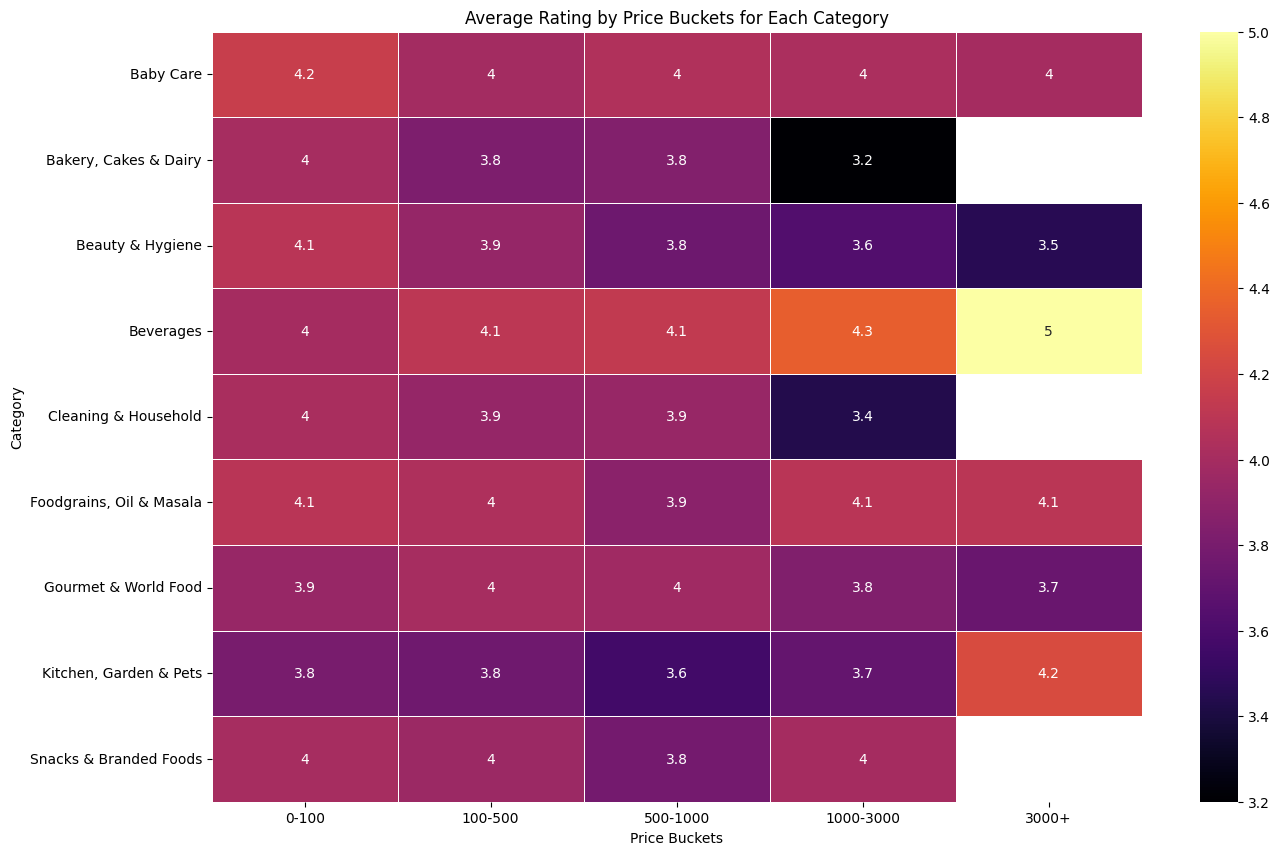

In [43]:
# Creating HeatMap
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pivot_table.set_index('Category'), annot=True, cmap='inferno', linewidths=0.5, ax=ax)
ax.set_title('Average Rating by Price Buckets for Each Category')
ax.set_xlabel('Price Buckets')
ax.set_ylabel('Category')

plt.show()

<font face="Rage" size=6 color='b2fba5'> Observations </font> <br>

1. **Consistently High Ratings for Low-Cost Items in Various Categories:**

  Categories like "Baby Care", "Beauty & Hygiene", and "Foodgrains, Oil & Masala" receive consistently high ratings in the lower price ranges (₹0-₹100 and ₹100-₹500). This indicates that customers are very satisfied with the more affordable products in these categories.

  **Actionable Insight:** Enhance and promote the range of affordable products in these categories to maintain high customer satisfaction and attract price-sensitive customers.

2. **High Ratings for Premium Products in Specific Categories:**

  The "Beverages" category shows high ratings in the higher price ranges (₹1000-₹3000 and ₹3000+), indicating that customers appreciate and are satisfied with premium-priced products.

  **Actionable Insight:** Highlight the quality and unique features of premium products in the "Beverages" category through marketing campaigns. Consider introducing more premium options to cater to this customer segment.

3. **Potential for Improvement in Mid-Range Products:**

  Categories like "Beauty & Hygiene" and "Cleaning & Household" experience a drop in ratings for mid-range price ranges (₹500-₹1000 and ₹1000-₹3000).

  **Actionable Insight:** Investigate customer feedback for mid-range products in these categories to identify pain points. Focus on improving product quality or offering better value for money to enhance customer satisfaction.

4. **Opportunity for Growth in High-End Segments for Kitchen and Garden Products:**

  The "Kitchen, Garden & Pets" category has notably high ratings in the highest price range (₹3000+).

  **Actionable Insight:** Explore opportunities to introduce or expand high-end products in the "Kitchen, Garden & Pets" category. Emphasize the premium quality and unique features of these products in marketing efforts to attract customers willing to spend more.


####<font face="Rage" size=6 color='Lightblue'> Price Sensitivity </font><br>

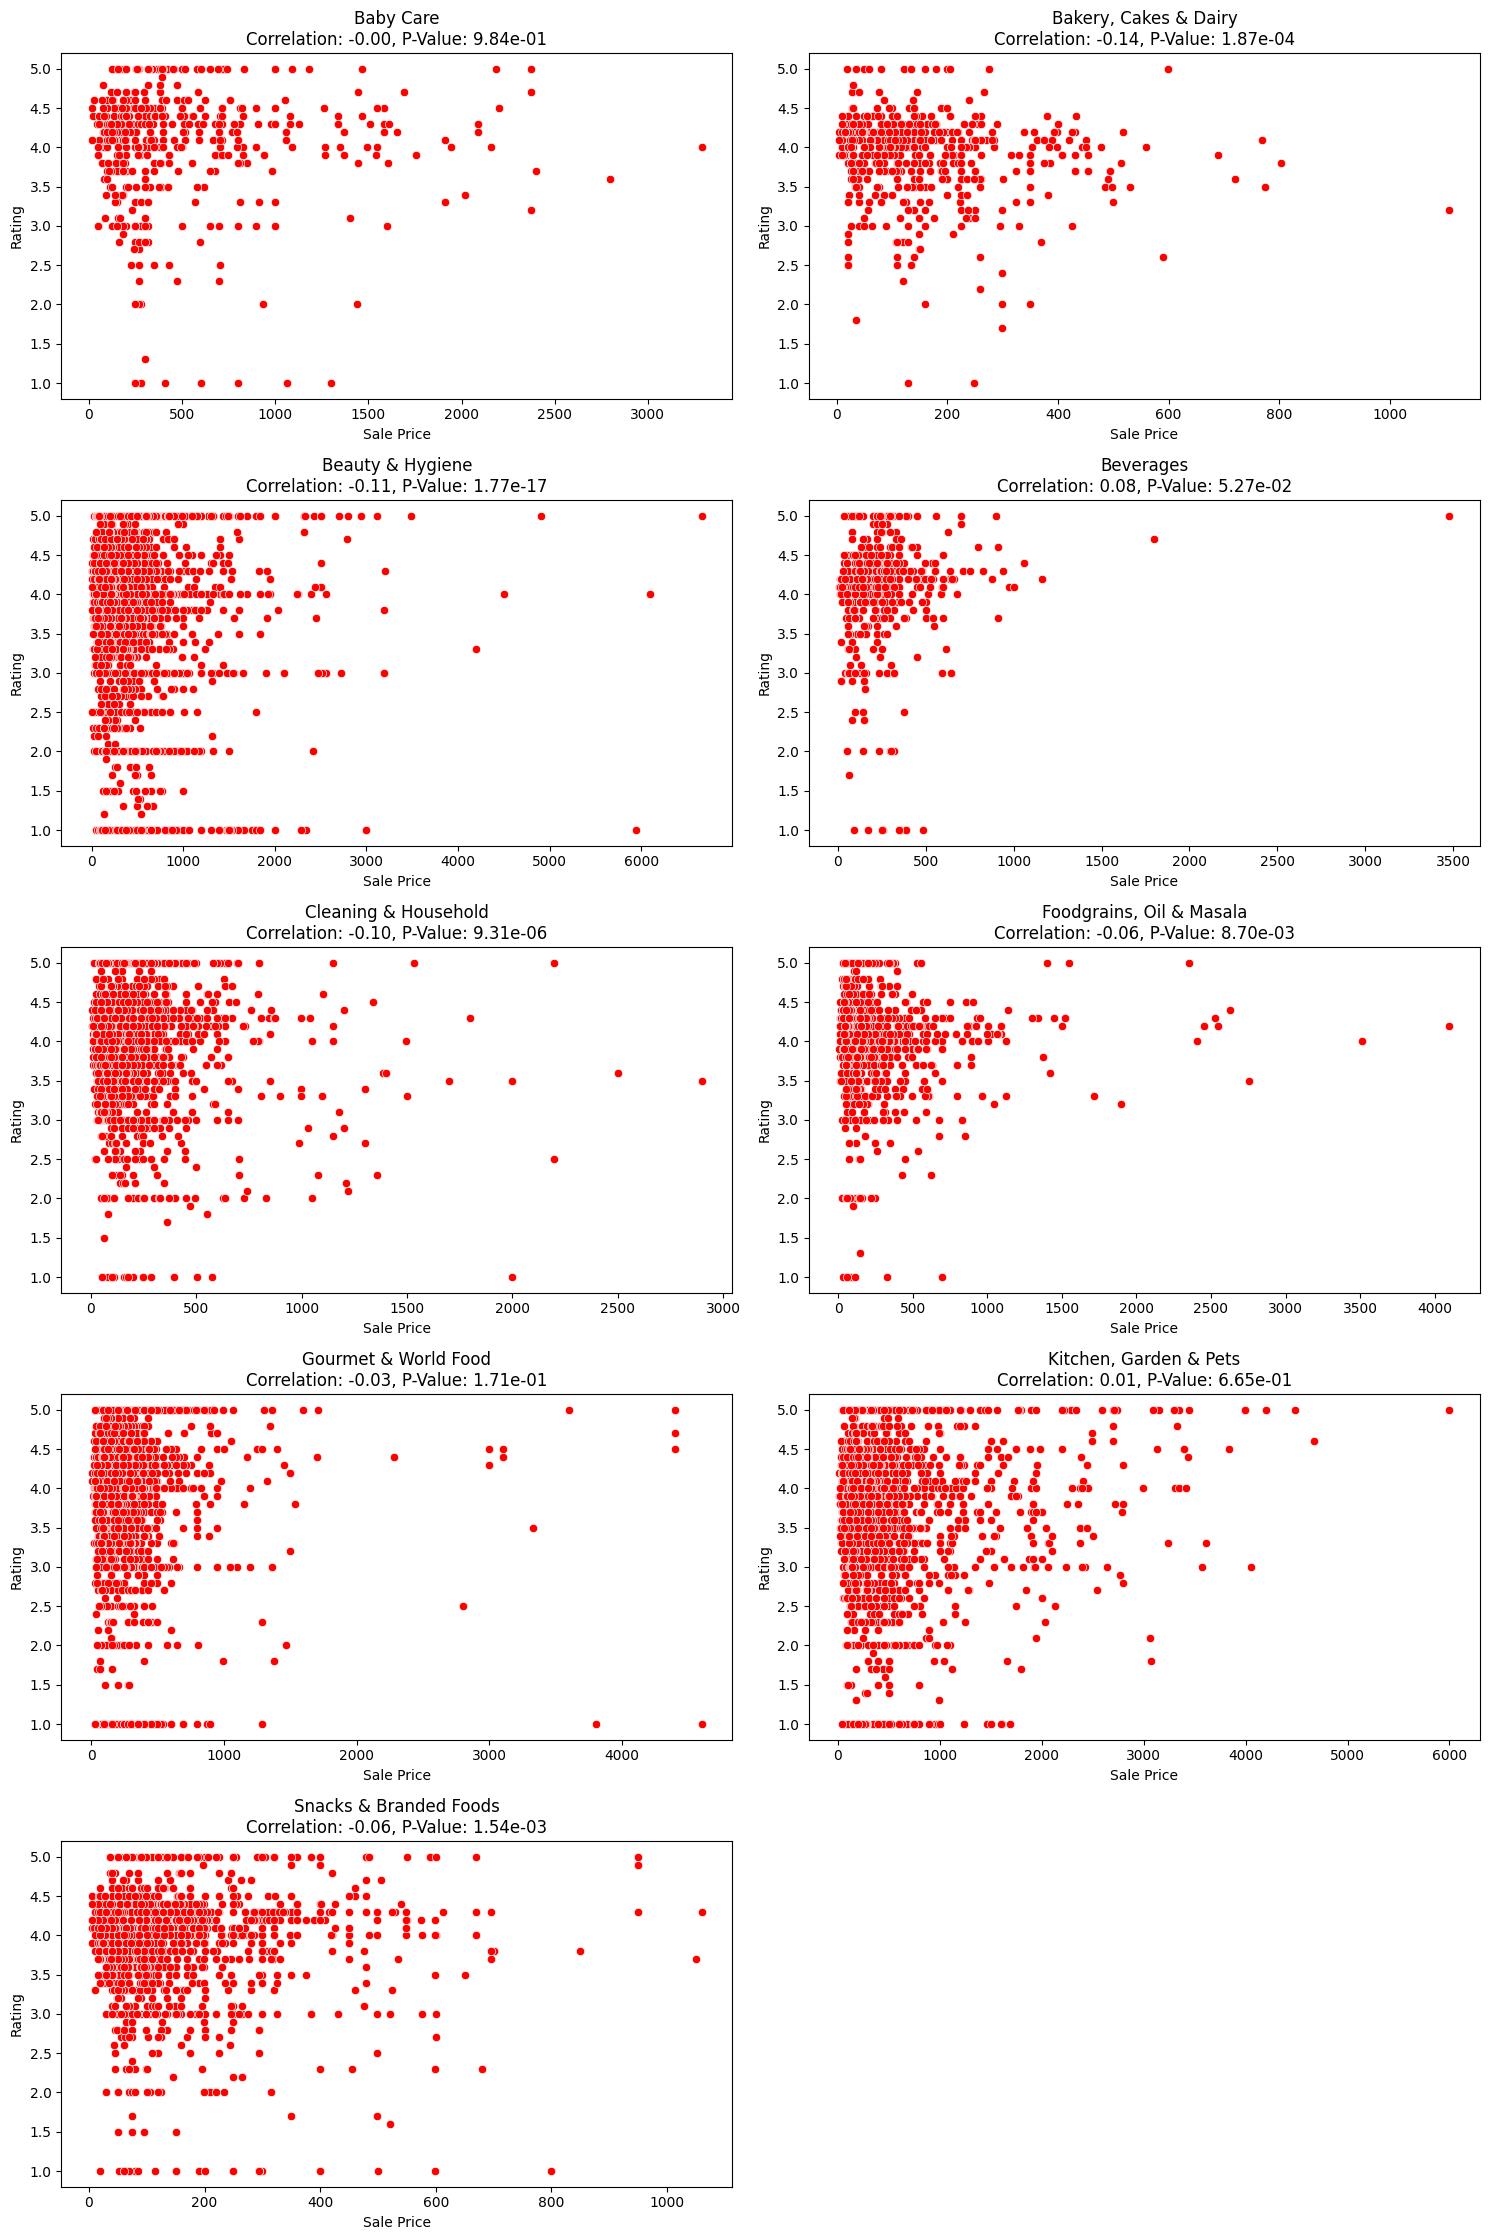

In [44]:
from scipy.stats import pearsonr

# Examine the relationship between sale price and customer rating for each product category.
category_correlations = df_valid.groupby('category').apply(lambda x: pearsonr(x['sale_price'], x['rating']))

# Separate the correlation strength and statistical significance for each category.
category_corr_df = pd.DataFrame(category_correlations.tolist(), index=category_correlations.index, columns=['correlation', 'p_value']).reset_index()

# Correlation plot
fig, axes = plt.subplots(len(category_corr_df) // 2 + len(category_corr_df) % 2, 2, figsize=(15, len(category_corr_df) * 2.5))
axes = axes.flatten()

for ax, category in zip(axes, category_corr_df['category']):
    category_data = df_valid[df_valid['category'] == category]
    correlation = category_corr_df[category_corr_df['category'] == category]['correlation'].values[0]
    p_value = category_corr_df[category_corr_df['category'] == category]['p_value'].values[0]
    sns.scatterplot(x='sale_price', y='rating', data=category_data, ax=ax, color = 'red')
    ax.set_title(f'{category}\nCorrelation: {correlation:.2f}, P-Value: {p_value:.2e}')
    ax.set_xlabel('Sale Price')
    ax.set_ylabel('Rating')

# Remove any empty subplots
for i in range(len(category_corr_df), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [156]:
category_corr_df

category  correlation       p_value
0                 Baby Care    -0.000930  9.835180e-01
1     Bakery, Cakes & Dairy    -0.144399  1.867546e-04
2          Beauty & Hygiene    -0.114747  1.767618e-17
3                 Beverages     0.076968  5.273964e-02
4      Cleaning & Household    -0.096558  9.311869e-06
5  Foodgrains, Oil & Masala    -0.056013  8.700095e-03
6      Gourmet & World Food    -0.027958  1.710191e-01
7    Kitchen, Garden & Pets     0.008644  6.651999e-01
8    Snacks & Branded Foods    -0.063715  1.537272e-03

<font face="Rage" size=6 color='b2fba5'> Observations </font> <br>


#### Weak or No Correlation:
Most categories exhibit weak correlations, implying that factors other than price are more influential in determining customer satisfaction.
<br><br>

#### Statistically Significant Correlations:
Even with weak correlations in certain categories, the p-values indicate statistical significance, suggesting that these correlations are not merely due to random chance.


####<font face="Rage" size=6 color='Lightblue'> Quality Assesment </font><br>

*Examine how ratings are distributed within each category to identify patterns and unusual product performance.*

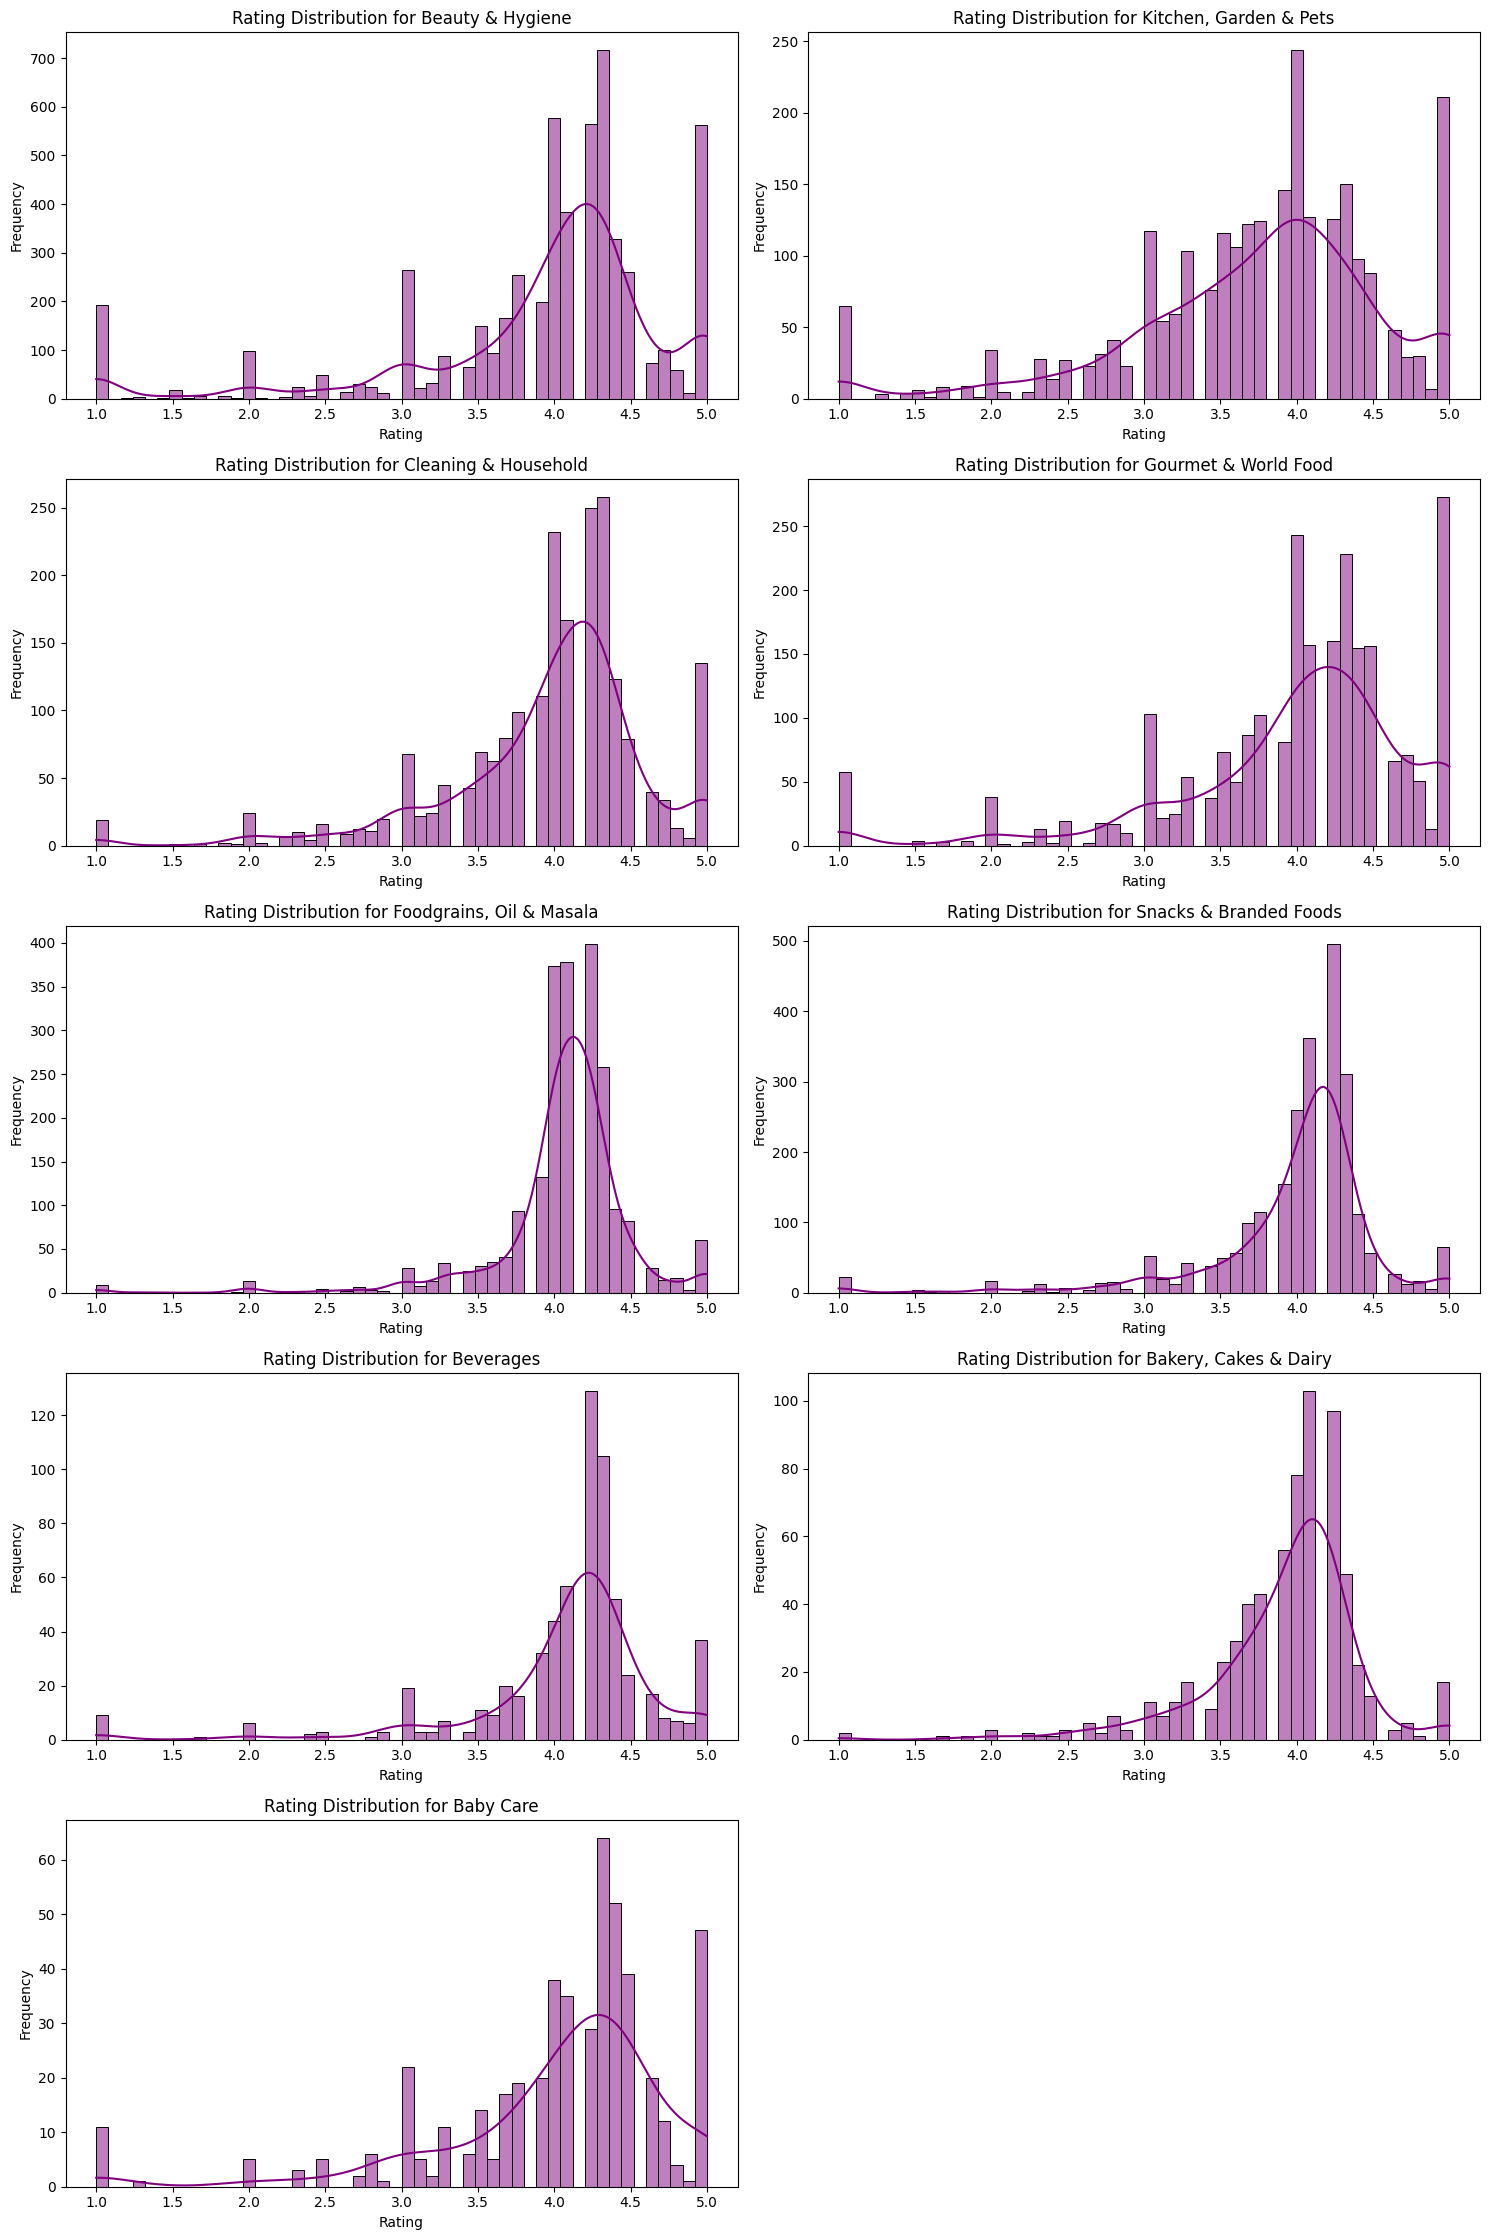

In [45]:
# Plotting the distribution of ratings within each category

# total categories
df_product_rated = big_basket_details[big_basket_details.rating > 0]
categories = df_product_rated['category'].unique()

fig, axes = plt.subplots(len(categories) // 2 + len(categories) % 2, 2, figsize=(15, len(categories) * 2.5))
axes = axes.flatten()

for ax, category in zip(axes, categories):
    category_data = df_product_rated[df_product_rated['category'] == category]
    sns.histplot(
    category_data['rating'],
    bins=50,
    ax=ax,
    color='purple',
    kde=True,
    )
    ax.set_title(f'Rating Distribution for {category}')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Frequency')

# Delete any empty subplots
for i in range(len(categories), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<font face="Rage" size=6 color='b2fba5'> Observations </font> <br>

#### Trends in Rating Distributions:
- Categories like "Beverages," "Foodgrains, Oil & Masala," and "Baby Care" show a high concentration of top ratings, indicating strong product quality and high customer satisfaction.
- In contrast, "Beauty & Hygiene" and "Cleaning & Household" exhibit a broader range of ratings, reflecting varying levels of customer satisfaction.

#### Outliers in Product Quality:
- Some categories, such as "Kitchen, Garden & Pets" and "Gourmet & World Food," include products with notably low ratings, highlighting areas where customer expectations were not met.
- Identifying these low-rated outliers can help focus efforts on quality improvements for specific products within these categories.


##<font face="Rage" size=7 color='#d39aed'>Experimenting with DataPrep Github
 </font><br>

In [3]:
!pip install -U git+https://github.com/sfu-db/dataprep.git@develop --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from dataprep.eda import *
from dataprep.datasets import load_dataset
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report
from dataprep.clean import clean_headers
from dataprep.clean import clean_duplication
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
bb_df = big_basket_details.dropna()
bb_df

index                                            product  \
0          1             Garlic Oil - Vegetarian Capsule 500 mg   
1          2                              Water Bottle - Orange   
2          3                     Brass Angle Deep - Plain, No.2   
3          4  Cereal Flip Lid Container/Storage Jar - Assort...   
4          5                 Creme Soft Soap - For Hands & Body   
...      ...                                                ...   
27550  27551         Wottagirl! Perfume Spray - Heaven, Classic   
27551  27552                                           Rosemary   
27552  27553                       Peri-Peri Sweet Potato Chips   
27553  27554                          Green Tea - Pure Original   
27554  27555                     United Dreams Go Far Deodorant   

                     category              sub_category  \
0            Beauty & Hygiene                 Hair Care   
1      Kitchen, Garden & Pets     Storage & Accessories   
2        Cleaning & Household               Pooja Needs   
3        Cleaning & Household      Bins & Bathroom Ware   
4            Beauty & Hygiene          Bath & Hand Wash   
...                       ...                       ...   
27550        Beauty & Hygiene         Fragrances & Deos   
27551    Gourmet & World Food    Cooking & Baking Needs   
27552    Gourmet & World Food  Snacks, Dry Fruits, Nuts   
27553               Beverages                       Tea   
27554        Beauty & Hygiene            Men's Grooming   

                            brand  sale_price  market_price  \
0               Sri Sri Ayurveda       220.00         220.0   
1                      Mastercook      180.00         180.0   
2                             Trm      119.00         250.0   
3                          Nakoda      149.00         176.0   
4                           Nivea      162.00         162.0   
...                           ...         ...           ...   
27550                      Layerr      199.20         249.0   
27551                    Puramate       67.50          75.0   
27552                      FabBox      200.00         200.0   
27553                      Tetley      396.00         495.0   
27554  United Colors Of Benetton       214.53         390.0   

                           type  rating  \
0              Hair Oil & Serum     4.1   
1        Water & Fridge Bottles     2.3   
2               Lamp & Lamp Oil     3.4   
3      Laundry, Storage Baskets     3.7   
4          Bathing Bars & Soaps     4.4   
...                         ...     ...   
27550                   Perfume     3.9   
27551  Herbs, Seasonings & Rubs     4.0   
27552            Nachos & Chips     3.8   
27553                  Tea Bags     4.2   
27554          Men's Deodorants     4.5   

                                             description  
0      This Product contains Garlic Oil that is known...  
1      Each product is microwave safe (without lid), ...  
2      A perfect gift for all occasions, be it your m...  
3      Multipurpose container with an attractive desi...  
4      Nivea Creme Soft Soap gives your skin the best...  
...                                                  ...  
27550  Layerr brings you Wottagirl Classic fragrant b...  
27551  Puramate rosemary is enough to transform a dis...  
27552  We have taken the richness of Sweet Potatoes (...  
27553  Tetley Green Tea with its refreshing pure, ori...  
27554  The new mens fragrance from the United Dreams ...  

[18840 rows x 10 columns]


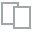
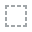
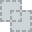
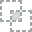
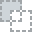
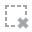
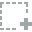
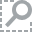
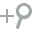
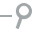
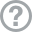
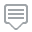
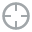
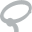
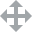
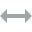
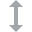
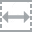
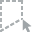
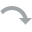
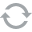
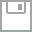
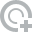
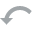
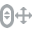
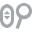
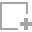
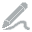
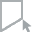
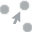
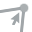
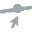

In [17]:
plot(bb_df)

Computing dropna-363655b785c368e6372b453ffdaa5f23:  80%|████████  | 1068/1332 [00:01<00:00, 741.00it/s]                                          /usr/local/lib/python3.10/dist-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:275: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:275: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:275: FutureWarning: The frame.app

DataPrep Report
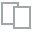
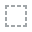
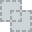
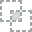
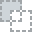
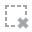
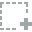
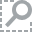
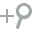
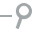
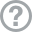
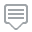
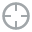
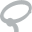
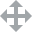
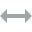
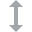
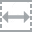
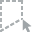
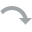
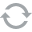
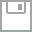
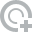
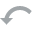
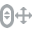
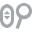
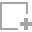
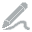
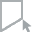
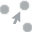
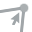
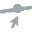

In [18]:
create_report(bb_df)